In [98]:
#Import Required Library
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Point
from matplotlib import pyplot as plt
import matplotlib_map_utils as mu


In [99]:
#Change my working directory
os.getcwd()
path ='C:/Users/Sushant/OneDrive - Lamar University/1st semester/GIS/Inclass assignment/2nd/TX_Waterwell'
os.chdir(path)

<h4> Read Water Level Data</h4> 
Read Water Level from files('WaterLevelsMajor.txt') subset those for the Gulf Coast Aquifer

In [100]:
#Read the well main text
a = pd.read_csv('WellMain.txt', sep = '|', encoding = 'ISO-8859-1',low_memory=False)

In [101]:
a.head()

,StateWellNumber,County,RiverBasin,GMA,RWPA,GCD,AquiferCode,AquiferCodeDescription,AquiferId,Aquifer,...,WellReportTrackingNumber,PluggingReportTrackingNumber,USGSSiteNumber,TCEQSourceId,GCDWellNumber,OwnerWellNumber,OtherWellNumber,PreviousStateWellNumber,CreatedDate,LastUpdateDate
0,140301,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGDP,"Ogallala Formation, Dakota Group and Purgatoir...",58,Ogallala/Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2004-05-18,2024-05-24
1,140302,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGDP,"Ogallala Formation, Dakota Group and Purgatoir...",58,Ogallala/Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2003-12-23,2022-12-02
2,140601,Dallam,Canadian,1,A - Panhandle,North Plains GCD,211DKOP,Dakota Group and Purgatoire Formation,23,Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-01,2020-01-16
3,140901,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGLL,Ogallala Formation,21,Ogallala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-08-30,2018-03-27
4,140902,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGLD,Ogallala Formation and Dakota Group,58,Ogallala/Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-01,2020-01-16


In [102]:
a.columns

Index(['StateWellNumber', 'County', 'RiverBasin', 'GMA', 'RWPA', 'GCD',
       'AquiferCode', 'AquiferCodeDescription', 'AquiferId', 'Aquifer',
       'Classification', 'AquiferPickMethod', 'LatitudeDD', 'Dlat', 'Mlat',
       'Slat', 'LongitudeDD', 'Dlong', 'Mlong', 'Slong', 'CoordinateSource',
       'Owner', 'Driller', 'WellDepth', 'DepthSource', 'LandSurfaceElevation',
       'LandSurfaceElevationMethod', 'DrillingStartDate', 'DrillingMonth',
       'DrillingDay', 'DrillingYear', 'DrillingEndDate', 'DrillingMethod',
       'BoreHoleCompletion', 'WellType', 'Pump', 'PowerType', 'WellUse',
       'WaterLevelStatus', 'CurrentWaterLevelWell', 'WaterQualityAvailable',
       'CurrentWaterQualityWell', 'ReportingAgency', 'OtherDataAvailable',
       'Remarks', 'WellReportTrackingNumber', 'PluggingReportTrackingNumber',
       'USGSSiteNumber', 'TCEQSourceId', 'GCDWellNumber', 'OwnerWellNumber',
       'OtherWellNumber', 'PreviousStateWellNumber', 'CreatedDate',
       'LastUpdateDate'],


In [103]:
cols= ['StateWellNumber','County','LongitudeDD','LatitudeDD','LandSurfaceElevationMethod','WellDepth']

In [104]:
#Create a subset of Gulf Cost Wells in rows and selected columns from above
#Rows and columns both being filtered 
asub = a.loc[a.County=='Jefferson',cols]
asub.head()

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth
104893,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0
104894,6154902,Jefferson,-94.271111,30.159167,Digital Elevation Model -DEM,450.0
104895,6154903,Jefferson,-94.271111,30.159445,Interpolated From Topo Map,550.0
104896,6154904,Jefferson,-94.270278,30.161667,Digital Elevation Model -DEM,530.0
104897,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0


In [105]:
asub.describe()

,StateWellNumber,LongitudeDD,LatitudeDD,WellDepth
count,4.280000e+02,428.000000,428.000000,422.000000
mean,6.283796e+06,-94.185266,29.971791,449.199052
std,1.163050e+05,0.137146,0.119684,1426.164637
min,6.154901e+06,-94.442500,29.657223,6.000000
25%,6.163052e+06,-94.280208,29.883055,52.750000
50%,6.301204e+06,-94.194306,29.993195,152.500000
75%,6.407829e+06,-94.094583,30.060556,280.000000
max,6.424601e+06,-93.872500,30.180278,15005.000000


In [130]:
len(asub)

428

In [131]:
#Read Water Levels Major.txt
fname = 'WaterLevelsMajor.txt'
b = pd.read_csv(fname, sep = '|', encoding = 'ISO-8859-1',low_memory=False)

In [108]:
b.head(5) #this step take a while

,StateWellNumber,County,Aquifer,Status,MeasurementMonth,MeasurementDay,MeasurementYear,MeasurementDate,MeasurementTime,DepthFromLSD,LandElevation,LandElevationMethod,WaterElevation,MeasurementNumber,MeasuringAgency,MethodOfMeasurement,Remarks,Comments,CreatedDate,LastUpdateDate
0,140901,Dallam,Ogallala,Publishable,4.0,16.0,1958.0,1958-04-16,NaN,73.00,4669.0,Interpolated From Topo Map,4596.00,1,Other or Source of Measurement Unknown,Unknown,Accurately reflects water level conditions,NaN,NaN,NaN
1,140901,Dallam,Ogallala,Publishable,4.0,6.0,1960.0,1960-04-06,NaN,77.00,4669.0,Interpolated From Topo Map,4592.00,1,Other or Source of Measurement Unknown,Unknown,Accurately reflects water level conditions,NaN,NaN,NaN
2,140901,Dallam,Ogallala,Publishable,1.0,5.0,1961.0,1961-01-05,NaN,79.10,4669.0,Interpolated From Topo Map,4589.90,1,Texas Water Development Board,Steel Tape,NaN,NaN,NaN,NaN
3,140901,Dallam,Ogallala,Publishable,1.0,19.0,1962.0,1962-01-19,NaN,76.63,4669.0,Interpolated From Topo Map,4592.37,1,Texas Water Development Board,Steel Tape,NaN,NaN,NaN,NaN
4,140901,Dallam,Ogallala,Publishable,1.0,9.0,1963.0,1963-01-09,NaN,87.70,4669.0,Interpolated From Topo Map,4581.30,1,Texas Water Development Board,Steel Tape,NaN,NaN,NaN,NaN


In [109]:
b.columns #List all the columns

Index(['StateWellNumber', 'County', 'Aquifer', 'Status', 'MeasurementMonth',
       'MeasurementDay', 'MeasurementYear', 'MeasurementDate',
       'MeasurementTime', 'DepthFromLSD', 'LandElevation',
       'LandElevationMethod', 'WaterElevation', 'MeasurementNumber',
       'MeasuringAgency', 'MethodOfMeasurement', 'Remarks', 'Comments',
       'CreatedDate', 'LastUpdateDate'],
      dtype='object')

In [110]:
bcol = ['StateWellNumber','County','MeasurementYear','WaterElevation','DepthFromLSD']

In [111]:
bsub = b.loc[b.County=='Jefferson',bcol] #Subset all rows of selected
bsub.head()

,StateWellNumber,County,MeasurementYear,WaterElevation,DepthFromLSD
878137,6154901,Jefferson,1941.0,23.10,6.90
878138,6154902,Jefferson,1986.0,-7.00,35.00
878139,6154902,Jefferson,1987.0,-3.25,31.25
878140,6154902,Jefferson,1989.0,-9.90,37.90
878141,6154902,Jefferson,1989.0,-16.36,44.36


In [112]:
len(bsub) #Total samples (records) in the Gulf Coast within the database

977

In [113]:
#Extract Water Elevation Values
WLGCNumeric = bsub[['StateWellNumber', 'WaterElevation','DepthFromLSD']]
WLmean = WLGCNumeric.groupby('StateWellNumber').mean()#Take Temprary Mean
WLmean.dropna(inplace=True)
print(WLmean)

                 WaterElevation  DepthFromLSD
StateWellNumber                              
6154901               23.100000      6.900000
6154902              -17.178889     45.178889
6154904              -17.287143     44.287143
6154905              -25.338571     51.338571
6155504               32.000000    -18.000000
...                         ...           ...
6423201                1.800000      3.200000
6423302                1.900000      1.100000
6423303                1.900000      1.100000
6424501                2.500000      2.500000
6424502                2.000000      3.000000

[195 rows x 2 columns]


<h4>Merge Aeverage Water Level and Well info into one table

In [114]:
#Merge with well infor and save to file for future use
#Inner Join Becasue I want only matching well that have both data 
WellData = pd.merge(asub,WLmean,on= 'StateWellNumber', how = 'inner')
WellData = WellData.loc[WellData.DepthFromLSD > 0]
WellData.to_csv('GCMeanWL.csv') #make a Copy for future use
WellData.head()


,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.100000,6.900000
1,6154902,Jefferson,-94.271111,30.159167,Digital Elevation Model -DEM,450.0,-17.178889,45.178889
2,6154904,Jefferson,-94.270278,30.161667,Digital Elevation Model -DEM,530.0,-17.287143,44.287143
3,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0,-25.338571,51.338571
7,6155701,Jefferson,-94.213889,30.130555,Interpolated From Topo Map,68.0,27.000000,9.000000


In [133]:
len(WellData)

185

In [115]:
#Turn Pandas Dataframe to a Geodataframe
#Creat geometry from the latitude and longitude colums
geometry = [Point(xy) for xy in zip(WellData['LongitudeDD'], WellData['LatitudeDD'])]

In [116]:
#Convert pandas dataframe to Geodataframe
Wellgpf = gpd.GeoDataFrame(WellData, geometry=geometry)

In [117]:
mu#optionally Set a coordinate reference system(CRS), e.g., WGS84
Wellgpf.set_crs(epsg=4326, inplace=True)

#Now 'Wellgpf' is a Geodataframe with points
print(Wellgpf)

     StateWellNumber     County  LongitudeDD  LatitudeDD  \
0            6154901  Jefferson   -94.266112   30.134722   
1            6154902  Jefferson   -94.271111   30.159167   
2            6154904  Jefferson   -94.270278   30.161667   
3            6154905  Jefferson   -94.271389   30.159167   
7            6155701  Jefferson   -94.213889   30.130555   
..               ...        ...          ...         ...   
190          6423201  Jefferson   -94.199722   29.742500   
191          6423302  Jefferson   -94.164167   29.741389   
192          6423303  Jefferson   -94.161667   29.739445   
193          6424501  Jefferson   -94.072500   29.668055   
194          6424502  Jefferson   -94.072778   29.667778   

       LandSurfaceElevationMethod  WellDepth  WaterElevation  DepthFromLSD  \
0      Interpolated From Topo Map       21.0       23.100000      6.900000   
1    Digital Elevation Model -DEM      450.0      -17.178889     45.178889   
2    Digital Elevation Model -DEM      530.0 

In [118]:
Wellgpf.columns


Index(['StateWellNumber', 'County', 'LongitudeDD', 'LatitudeDD',
       'LandSurfaceElevationMethod', 'WellDepth', 'WaterElevation',
       'DepthFromLSD', 'geometry'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

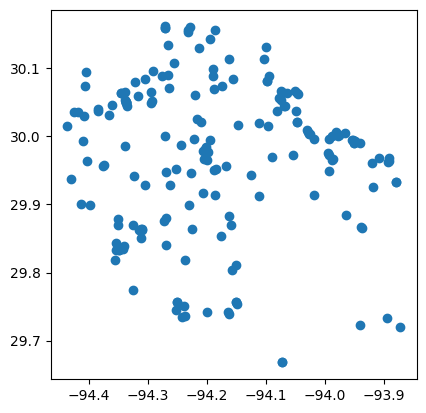

In [119]:
Wellgpf.plot()
plt.show

In [120]:
fJeff = 'JeffersonWGS84.gpkg'
Jeff = gpd.read_file(fJeff)

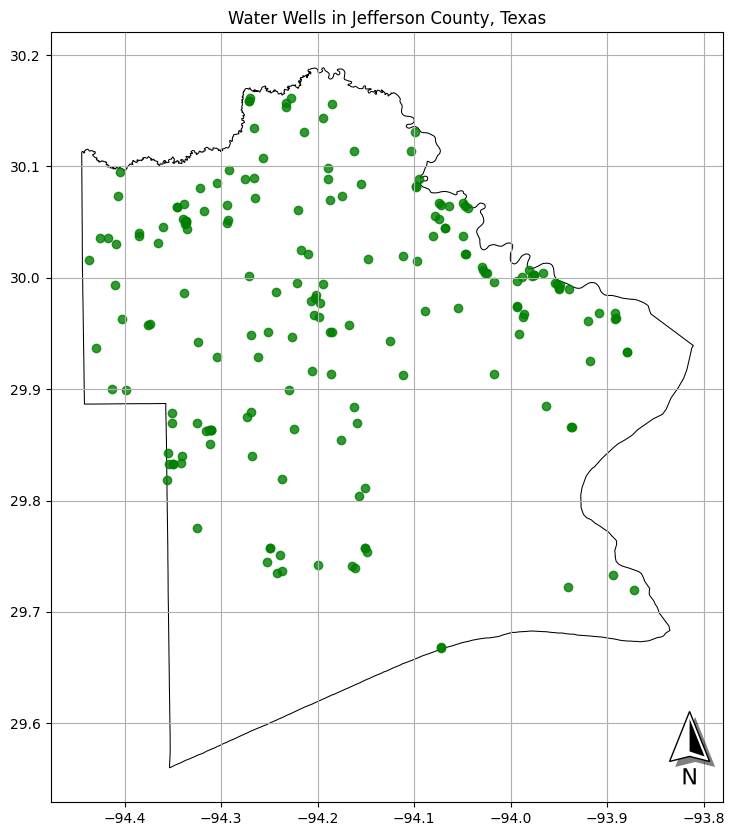

In [121]:
ax = Jeff.plot(figsize=(10,10), color='white', edgecolor='black', alpha=1, linewidth=0.75)
Wellgpf.plot(ax=ax, color='green', edgecolor='green', alpha=0.8)
plt.title("Water Wells in Jefferson County, Texas")
mu.north_arrow.north_arrow(ax=ax,location='lower right',rotation={"degrees":0})
plt.grid()
plt.show()

<h4> Geopandas Dataframe For the Selected Well


In [122]:
WID = 6154901# Selected Well Id for my selected well
Selwell = WellData.loc[WellData.StateWellNumber==WID]
Selwell

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.1,6.9


In [123]:
geom = [Point(xy) for xy in zip(Selwell['LongitudeDD'], Selwell['LatitudeDD'])]

#Convert Pandas DataFrame to GeoDataFrame
Selwellgpf = gpd.GeoDataFrame(Selwell, geometry=geom)

# Optionally ,Set a coordinate reference system (CRS), e.g., WGS84
Selwellgpf.set_crs(epsg=4326, inplace=True)

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD,geometry
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.1,6.9,POINT (-94.26611 30.13472)


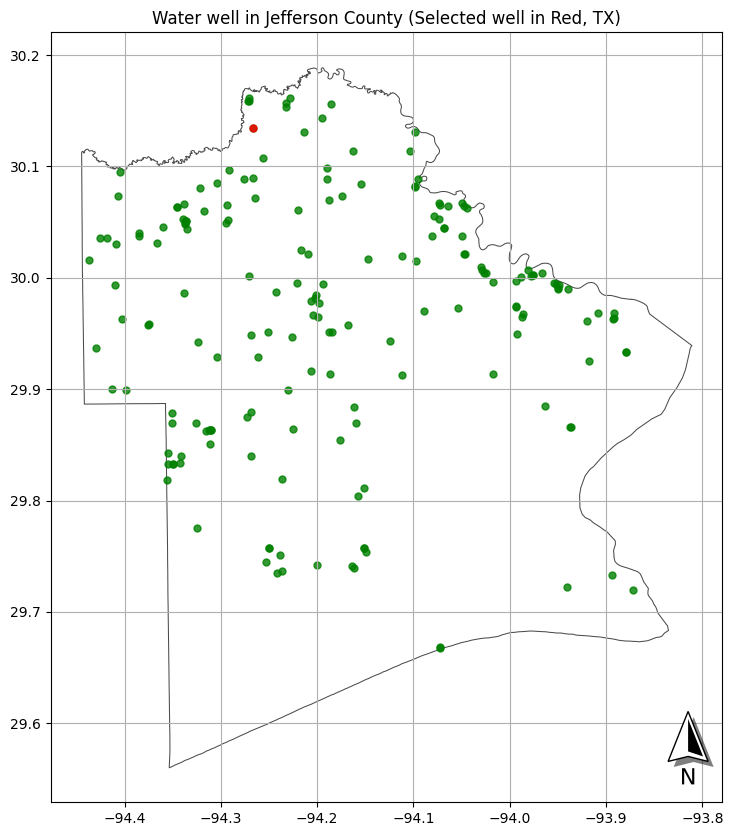

In [124]:
# Plotting the selected well on a map
ax = Jeff.plot(figsize=(10, 10), color='white', edgecolor='black', alpha=0.7, linewidth=0.75)
Wellgpf.plot(ax=ax, color='green', edgecolor='green', alpha=0.8, marker='o', markersize=25)
Selwellgpf.plot(ax=ax, color='red', edgecolor='red', alpha=0.8, marker='o', markersize=25)
mu.north_arrow.north_arrow(ax=ax,location='lower right',rotation={"degrees":0})
plt.title('Water well in Jefferson County (Selected well in Red, TX)')
plt.grid(visible=True)
plt.show()


In [125]:
selected = [6154901,6161602,6162303,6162305,6424502,6301301,6154905,6423302,6423201]
selected_wells = WellData[WellData.StateWellNumber.isin(selected)]
selected_wells

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.100000,6.900000
3,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0,-25.338571,51.338571
16,6161602,Jefferson,-94.407223,30.073611,Interpolated From Topo Map,300.0,29.300000,6.700000
25,6162303,Jefferson,-94.275555,30.089167,Interpolated From Topo Map,102.0,30.000000,8.000000
26,6162305,Jefferson,-94.291667,30.096389,Interpolated From Topo Map,208.0,31.000000,8.000000
101,6301301,Jefferson,-93.908612,29.968055,Interpolated From Topo Map,1000.0,-3.320000,15.320000
190,6423201,Jefferson,-94.199722,29.742500,Interpolated From Topo Map,178.0,1.800000,3.200000
191,6423302,Jefferson,-94.164167,29.741389,Interpolated From Topo Map,70.0,1.900000,1.100000
194,6424502,Jefferson,-94.072778,29.667778,Interpolated From Topo Map,10.0,2.000000,3.000000


In [126]:
selected_wells.to_csv('pumpswell.csv')

In [127]:
geom2 = [Point(xy) for xy in zip(selected_wells['LongitudeDD'], selected_wells['LatitudeDD'])]

#Convert Pandas DataFrame to GeoDataFrame
selected_wellsgpf = gpd.GeoDataFrame(selected_wells, geometry=geom2)

# Optionally ,Set a coordinate reference system (CRS), e.g., WGS84
selected_wellsgpf.set_crs(epsg=4326, inplace=True)

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD,geometry
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.100000,6.900000,POINT (-94.26611 30.13472)
3,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0,-25.338571,51.338571,POINT (-94.27139 30.15917)
16,6161602,Jefferson,-94.407223,30.073611,Interpolated From Topo Map,300.0,29.300000,6.700000,POINT (-94.40722 30.07361)
25,6162303,Jefferson,-94.275555,30.089167,Interpolated From Topo Map,102.0,30.000000,8.000000,POINT (-94.27556 30.08917)
26,6162305,Jefferson,-94.291667,30.096389,Interpolated From Topo Map,208.0,31.000000,8.000000,POINT (-94.29167 30.09639)
101,6301301,Jefferson,-93.908612,29.968055,Interpolated From Topo Map,1000.0,-3.320000,15.320000,POINT (-93.90861 29.96806)
190,6423201,Jefferson,-94.199722,29.742500,Interpolated From Topo Map,178.0,1.800000,3.200000,POINT (-94.19972 29.7425)
191,6423302,Jefferson,-94.164167,29.741389,Interpolated From Topo Map,70.0,1.900000,1.100000,POINT (-94.16417 29.74139)
194,6424502,Jefferson,-94.072778,29.667778,Interpolated From Topo Map,10.0,2.000000,3.000000,POINT (-94.07278 29.66778)


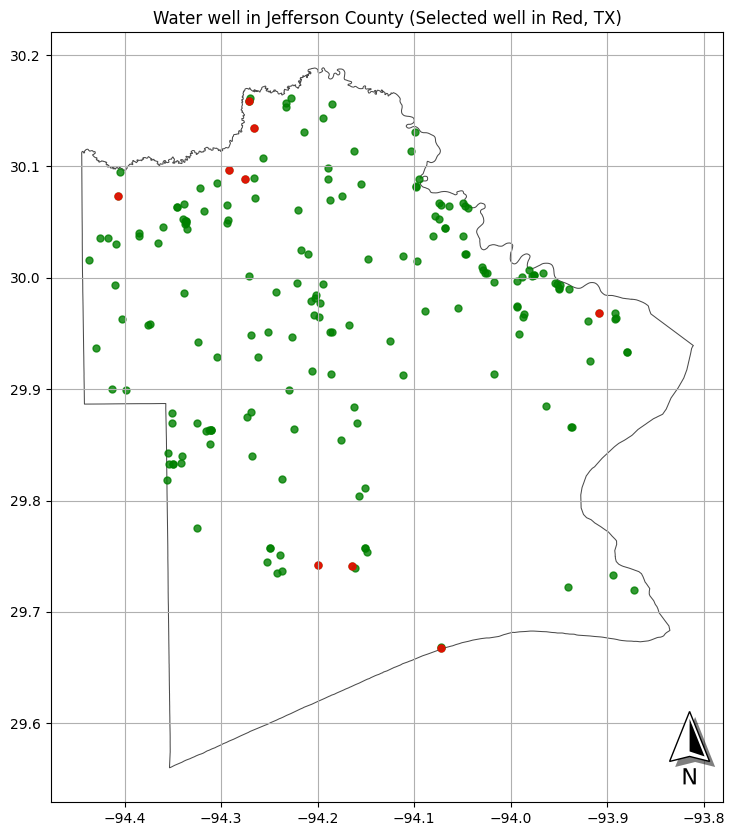

In [128]:
# Plotting the selected well on a map
ax = Jeff.plot(figsize=(10, 10), color='white', edgecolor='black', alpha=0.7, linewidth=0.75)
Wellgpf.plot(ax=ax, color='green', edgecolor='green', alpha=0.8, marker='o', markersize=25)
selected_wellsgpf.plot(ax=ax, color='red', edgecolor='red', alpha=0.8, marker='o', markersize=25)
mu.north_arrow.north_arrow(ax=ax,location='lower right',rotation={"degrees":0})
plt.title('Water well in Jefferson County (Selected well in Red, TX)')
plt.grid(visible=True)
plt.show()

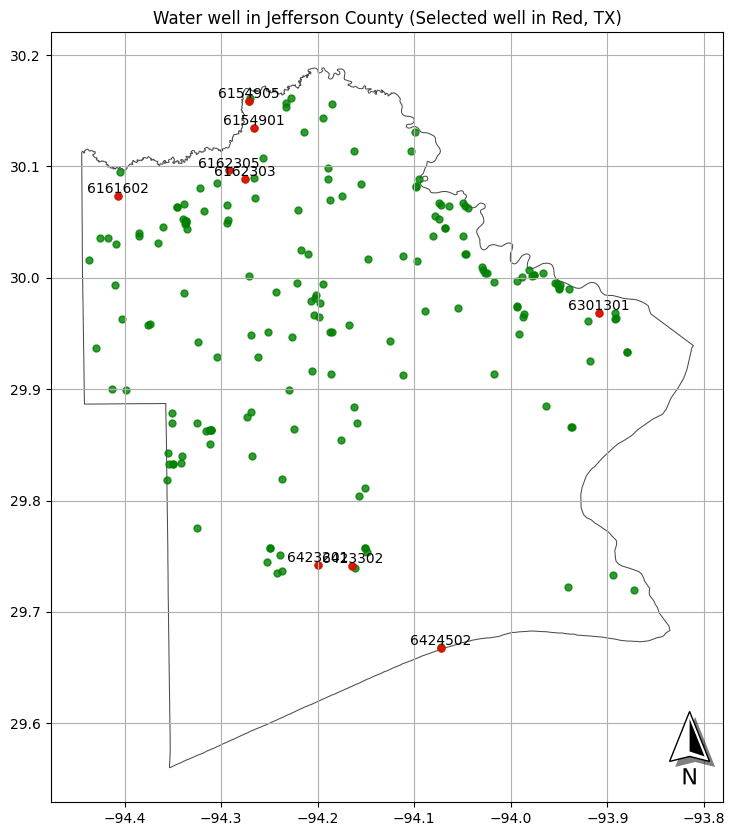

In [129]:
# Plot the base map and selected wells as before
ax = Jeff.plot(figsize=(10, 10), color='white', edgecolor='black', alpha=0.7, linewidth=0.75)
Wellgpf.plot(ax=ax, color='green', edgecolor='green', alpha=0.8, marker='o', markersize=25)
selected_wellsgpf.plot(ax=ax, color='red', edgecolor='red', alpha=0.8, marker='o', markersize=25)

# Add north arrow
mu.north_arrow.north_arrow(ax=ax, location='lower right', rotation={"degrees": 0})

# Label the StateWellNumber
for x, y, label in zip(selected_wellsgpf.geometry.x, selected_wellsgpf.geometry.y, selected_wellsgpf['StateWellNumber']):
    ax.text(x, y, str(label), fontsize=10, ha='center', va='bottom', color='black')

# Set title and grid
plt.title('Water well in Jefferson County (Selected well in Red, TX)')
plt.grid(visible=True)
plt.show()